In [1]:
"""
Created on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Author: Mélina Verger
"""

import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

# sns.set_theme(style="whitegrid")

In [2]:
X_train = pd.read_csv("./data/X_train.csv")
y_train = pd.read_csv("./data/y_train.csv")

In [3]:
df_viz = X_train.copy()
df_viz["final_result"] = y_train

In [4]:
color_palette_final_result = ["red", "blue"]
color_palette_gender = ["lightcoral", "mediumaquamarine"]

## Final result

<AxesSubplot:xlabel='final_result', ylabel='count'>

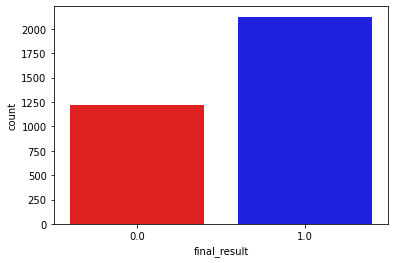

In [5]:
sns.countplot(x="final_result", data=df_viz, palette=color_palette_final_result)

## Gender repartition

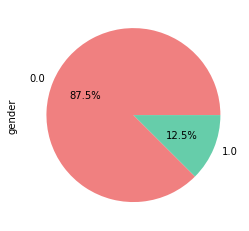

In [6]:
data = df_viz.groupby("gender")["gender"].count()
fig, ax = plt.subplots(figsize = (10,4))
data.plot.pie(autopct="%.1f%%", colors=color_palette_gender)
fig.set_facecolor("white")

## Final result by gender

<AxesSubplot:xlabel='final_result', ylabel='count'>

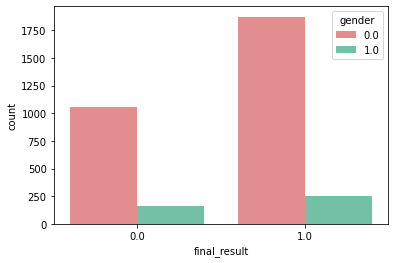

In [7]:
sns.countplot(hue="gender", x="final_result", data=df_viz, palette=color_palette_gender)

<AxesSubplot:xlabel='gender', ylabel='count'>

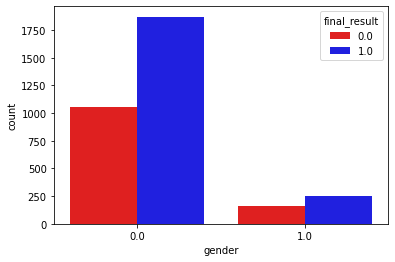

In [8]:
sns.countplot(x="gender",
              hue="final_result",
              data=df_viz,
              palette=color_palette_final_result)

In [29]:
#df_tmp = df_viz[["gender", "final_result"]]
#df_tmp[df_tmp["gender"] == 1][df_tmp["final_result"] == 0]

# There are 1,871 women who passed (gender=0, final_result=1).
# There are 1,059 women who failed (gender=0, final_result=0).
# There are 254 men who passed (gender=1, final_result=1).
# There are 164 men who failed (gender=1, final_result=0).

## Age

<AxesSubplot:xlabel='count', ylabel='age_band'>

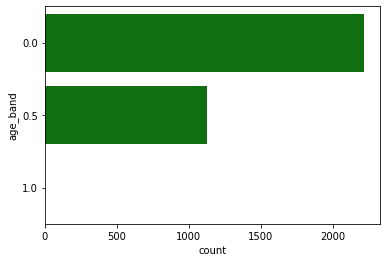

In [9]:
sns.countplot(y="age_band", data=df_viz, palette=["green"])

In [10]:
df_viz["age_band"].value_counts()

0.0    2217
0.5    1129
1.0       2
Name: age_band, dtype: int64

## Highest education

<AxesSubplot:xlabel='count', ylabel='highest_education'>

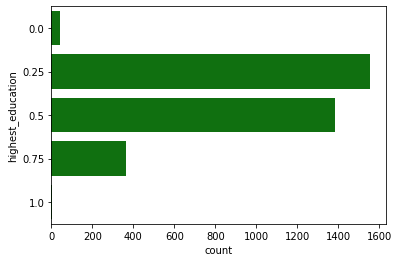

In [11]:
sns.countplot(y="highest_education",
              data=df_viz,
              palette=["green"])

In [12]:
df_viz["highest_education"].value_counts(sort=False)

0.25    1556
0.50    1383
0.75     364
0.00      41
1.00       4
Name: highest_education, dtype: int64

## Highest education by gender

In [13]:
occupation_counts = (df_viz.groupby(["gender"])["highest_education"]
                     .value_counts(normalize=True)
                     .rename("percentage")
                     .mul(100)
                     .reset_index()
                     .sort_values("gender")
                     .round(decimals=1)
                     )

In [14]:
occupation_counts

,gender,highest_education,percentage
0,0.0,0.2,46.9
1,0.0,0.5,41.0
2,0.0,0.8,10.7
3,0.0,0.0,1.3
4,0.0,1.0,0.1
5,1.0,0.2,43.5
6,1.0,0.5,43.3
7,1.0,0.8,12.2
8,1.0,0.0,1.0


<AxesSubplot:xlabel='highest_education', ylabel='percentage'>

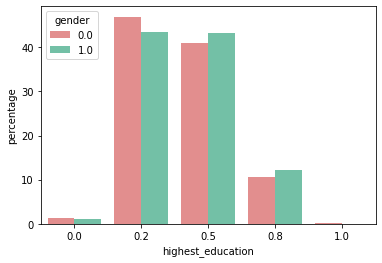

In [15]:
sns.barplot(x="highest_education",
            y="percentage",
            hue="gender",
            data=occupation_counts,
            palette=color_palette_gender)

## Number of previous attemps by gender

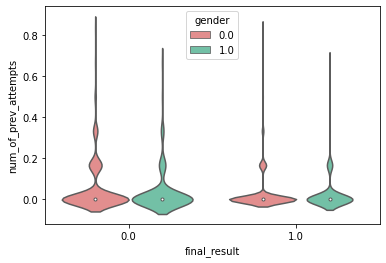

In [16]:
sns.violinplot(x="final_result", 
               y="num_of_prev_attempts",
               hue="gender",
               data=df_viz,
               palette=color_palette_gender)

plt.legend(loc='upper center', title = "gender")

***

In [17]:
X_train

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,0.0,0.25,1.0,0.0,0.000000,0.05,0.0
1,0.0,0.50,1.0,0.0,0.000000,0.05,0.0
2,0.0,0.50,1.0,0.0,0.000000,0.05,0.0
3,0.0,0.25,1.0,0.0,0.000000,0.05,0.0
4,0.0,0.25,0.0,0.0,0.000000,0.05,0.0
...,...,...,...,...,...,...,...
3343,0.0,0.25,0.0,0.5,0.000000,0.05,0.0
3344,0.0,0.75,1.0,0.5,0.000000,0.05,0.0
3345,0.0,0.25,1.0,0.0,0.166667,0.15,0.0
3346,0.0,0.25,1.0,0.0,0.000000,0.05,0.0


In [18]:
# reste imd_band, studied_credits and disability